In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neural_exploration import *
import pandas as pd
sns.set()

In [3]:
articles_file = "./data/webscope-articles.txt"
log_file = "/home/jupyter/neural_exploration/data/webscope-logs.txt"
articles_np = np.loadtxt(articles_file)
articles = {}
for art in articles_np:
    articles[int(art[0])] = [float(x) for x in art[1:]]


### Bandit settings

In [4]:
T = int(100000)
n_arms = 80
n_features = 12
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 2

SEED = 42
np.random.seed(SEED)

### LinUCB on linear rewards

In [5]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 10*np.dot(a, x)

In [6]:
bandit = ContextualBandit(T, n_arms, n_features, noise_std=noise_std, seed=SEED, articles=articles, log_file=log_file)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    import pdb
    pdb.set_trace()
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

> <ipython-input-6-375b4772e004>(8)<module>()
      6     import pdb
      7     pdb.set_trace()
----> 8     bandit.reset_rewards()
      9     model = LinUCB(bandit,
     10                    reg_factor=1.0,



ipdb>  c


100%|██████████| 100000/100000 [05:27<00:00, 304.89it/s, total regret=1e+5, % optimal arm=2.65%, ctr=2.8712%, i=2647, score=76]  


> <ipython-input-6-375b4772e004>(7)<module>()
      5 for i in range(n_sim):
      6     import pdb
----> 7     pdb.set_trace()
      8     bandit.reset_rewards()
      9     model = LinUCB(bandit,



ipdb>  c


100%|██████████| 100000/100000 [05:26<00:00, 306.34it/s, total regret=99945.0, % optimal arm=2.70%, ctr=2.4110%, i=2696, score=65]


### Sublinear regret growth : the bandit problem is solved efficiently

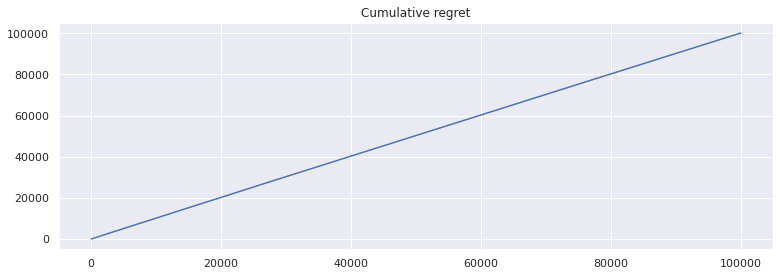

In [7]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('figures/linucb_linear.pdf')